In [1]:
import sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

class xgb_algorithm:
    def __init__(self, n_estimator, max_Tree_depth, learning_rate, random_state) -> None:
        #Initialize parameters
        self.n_estimators = n_estimator
        self.max_depth = max_Tree_depth
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.trees = []
        self.training_predicted = []
    def fit(self, X, y):
        self.init_pred = np.mean(y)
        y_pred = np.full_like(y, self.init_pred)
        #X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(dataset.drop(columns =target_name), dataset[target_name], test_size=0.25, random_state=42)
        for i in range(self.n_estimators):
            print('Building tree number: ', i)
            if i == 0:
                y_pred =  np.full_like(y, 0)
            else:
                y_pred = y_pred + self.learning_rate * self.trees[i-1].predict(X)
            y_train = y - y_pred
            # Initialize the Decision Tree classifier
            clf = DecisionTreeRegressor(random_state = self.random_state, max_depth= self.max_depth)
            # Train the classifier on the training data
            clf.fit(X, y_train)
            # put the tree into the queue
            self.trees.append(clf)
        y_pred = y_pred + self.learning_rate * self.trees[i].predict(X)
        self.training_predicted = y_pred
    def predict(self, X):
        n_tree = len(self.trees)
        print('Number of estimators: ', n_tree)
        for i, tree_i in enumerate(self.trees) :
            if i == 0:
                y_pred = tree_i.predict(X)
            else:
                y_pred = y_pred + self.learning_rate * tree_i.predict(X)
        return y_pred




In [2]:
def randomDataSet(num_samples, num_positive_percentage):
    #Generate random dataset with 5 numerical features and 5 categorical features, containing missing values in all features also
    # Generating numerical features
    num_features = pd.DataFrame({
        'num_feature1': np.random.randn(num_samples) * 100,
        'num_feature2': np.random.uniform(0, 100, num_samples),
        'num_feature3': np.random.randint(0, 1000, num_samples),
        'num_feature4': np.random.normal(50, 10, num_samples),
        'num_feature5': np.random.gamma(2, 1.5, num_samples),
    })

    # Generating categorical features
    cat_features = pd.DataFrame({
        'cat_feature1': np.random.choice(['A', 'B', 'C', 'D'], num_samples),
        'cat_feature2': np.random.choice(['Yes', 'No'], num_samples),
        'cat_feature3': np.random.choice(['Low', 'Medium', 'High'], num_samples),
        'cat_feature4': np.random.choice(['Red', 'Blue', 'Green', 'Yellow'], num_samples),
        'cat_feature5': np.random.choice(['Type1', 'Type2', 'Type3'], num_samples),
    })

    # Combine numerical and categorical features into one DataFrame
    dataset = pd.concat([num_features, cat_features], axis=1)
    target = np.zeros(num_samples)
    num_positive = int(num_positive_percentage * num_samples)
    positive_indices = np.random.choice(dataset.index, num_positive, replace=False)
    target[positive_indices] = 1
    #target = np.random.choice([0, 1], num_samples)

    # Add the target variable to the dataset
    dataset['target'] = target
    # Introduce NaN values with varying percentages in each feature
    nan_percentages = {
        'num_feature1': 0.05,  # 5% missing values
        'num_feature2': 0.1,   # 10% missing values
        'num_feature3': 0.15,  # 15% missing values
        'num_feature4': 0.2,   # 20% missing values
        'num_feature5': 0.25,  # 25% missing values
        'cat_feature1': 0.05,  # 5% missing values
        'cat_feature2': 0.1,   # 10% missing values
        'cat_feature3': 0.15,  # 15% missing values
        'cat_feature4': 0.2,   # 20% missing values
        'cat_feature5': 0.25,  # 25% missing values
    }

    # Apply NaN values to the dataset based on the specified percentages
    for column, nan_percentage in nan_percentages.items():
        nan_count = int(num_samples * nan_percentage)
        nan_indices = np.random.choice(dataset.index, nan_count, replace=False)
        dataset.loc[nan_indices, column] = np.nan
    # Display the first few rows of the dataset with the target variable
    # Display the first few rows of the dataset
    return dataset

Building tree number:  0
Building tree number:  1
Building tree number:  2
Building tree number:  3
Building tree number:  4
Number of estimators:  5


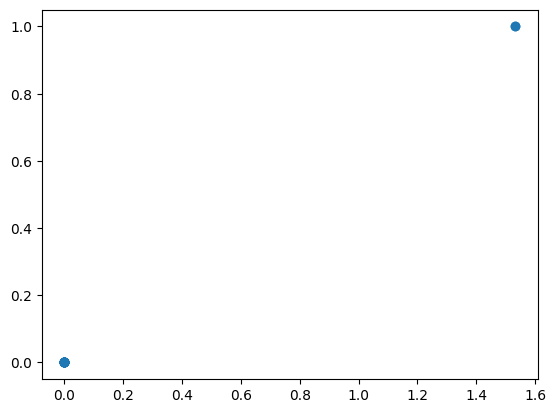

In [32]:

dataset = randomDataSet(20, 0.1)
target_name = 'target'
y_train = dataset[target_name]
cat_columns = ['cat_feature1','cat_feature2','cat_feature3','cat_feature4','cat_feature5']
dataset_encoded = pd.get_dummies(dataset, columns= cat_columns)
X_train = dataset_encoded.drop(columns = target_name)
model = xgb_algorithm(max_Tree_depth= 3, n_estimator= 5, learning_rate= 0.3, random_state= 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

import matplotlib.pyplot as plt
plt.scatter(y_pred,y_train)
plt.show()

<Figure size 1200x800 with 0 Axes>

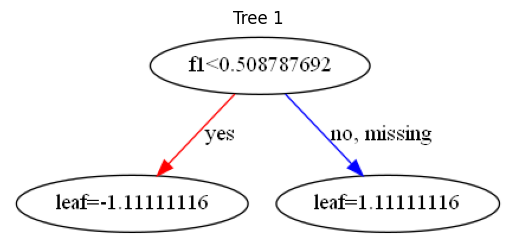

<Figure size 1200x800 with 0 Axes>

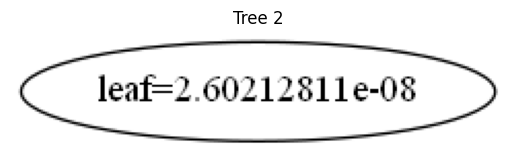

In [2]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a simple binary classification dataset with 10 samples and 2 features
X, y = make_classification(n_samples=10, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Convert the dataset into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X, label=y)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Binary classification
    'max_depth': 2,                  # Maximum depth of the trees
    'learning_rate': 1.0,            # Learning rate
    'eval_metric': 'logloss'         # Evaluation metric
}

# Train XGBoost with 2 estimators (boosting rounds)
num_round = 2
bst = xgb.train(params, dtrain, num_boost_round=num_round)

# Plot the first tree (booster 0)
plt.figure(figsize=(12, 8))
xgb.plot_tree(bst, num_trees=0)
plt.title('Tree 1')
plt.show()

# Plot the second tree (booster 1)
plt.figure(figsize=(12, 8))
xgb.plot_tree(bst, num_trees=1)
plt.title('Tree 2')
plt.show()

Log-loss after tree 0: 0.2846
Log-loss after tree 1: 0.2846


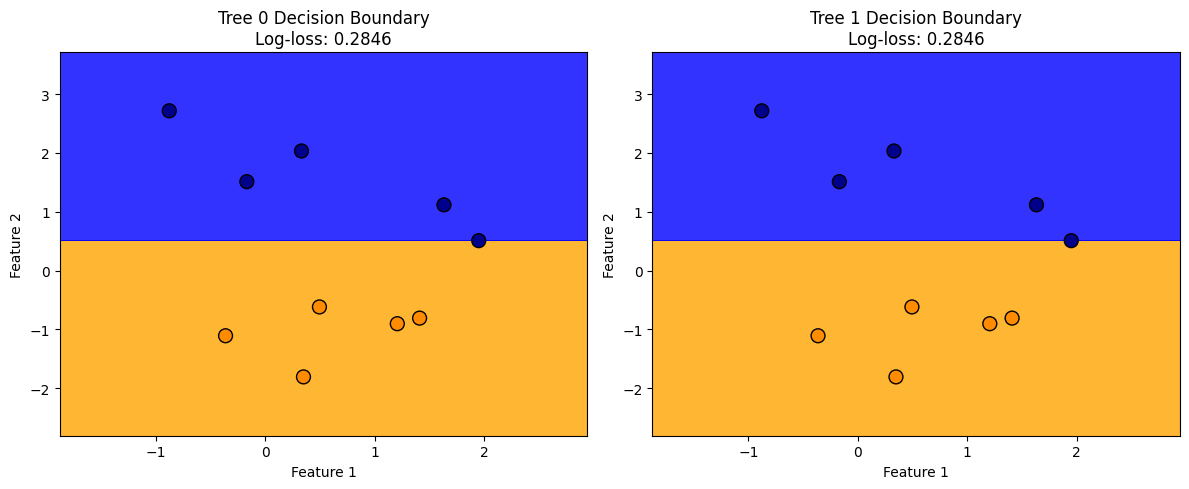

<Figure size 1200x800 with 0 Axes>

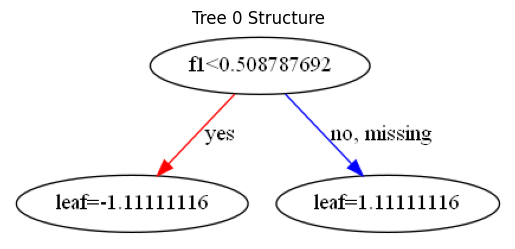

<Figure size 1200x800 with 0 Axes>

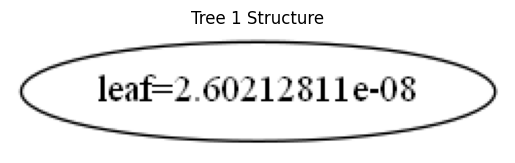

In [5]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss
from matplotlib.colors import ListedColormap

# Step 1: Generate a simple binary classification dataset
X, y = make_classification(n_samples=10, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Step 2: Convert the dataset into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X, label=y)

# Step 3: Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Binary classification
    'max_depth': 2,                  # Maximum depth of the trees
    'learning_rate': 1.0,            # Learning rate
    'eval_metric': 'logloss'         # Evaluation metric
}

# Step 4: Train XGBoost with 2 estimators (boosting rounds)
num_round = 2
bst = xgb.train(params, dtrain, num_boost_round=num_round)

# Step 5: Make predictions after each boosting round using `iteration_range`
y_pred_round0 = bst.predict(dtrain, iteration_range=(0, 1))  # Prediction after tree 0
y_pred_round1 = bst.predict(dtrain, iteration_range=(0, 2))  # Prediction after tree 1

# Step 6: Compute the log-loss after each round
loss_round0 = log_loss(y, y_pred_round0)
loss_round1 = log_loss(y, y_pred_round1)

# Print loss after each round
print(f"Log-loss after tree 0: {loss_round0:.4f}")
print(f"Log-loss after tree 1: {loss_round1:.4f}")

# Step 7: Visualizing the data points and decision boundaries for each tree

# Define the grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Plot decision boundary of tree 0
dtest = xgb.DMatrix(np.c_[xx.ravel(), yy.ravel()])
Z_round0 = bst.predict(dtest, iteration_range=(0, 1))
#y_pred_round0 = bst.predict(dtrain, iteration_range=(0, 1))  # Prediction after tree 0

Z_round0 = Z_round0.reshape(xx.shape)

# Plot decision boundary of tree 1
Z_round1 = bst.predict(dtest, iteration_range=(0, 2))
Z_round1 = Z_round1.reshape(xx.shape)

# Step 8: Create a scatter plot to visualize the data points and decision boundary after tree 0
plt.figure(figsize=(12, 5))

# Left plot: after tree 0
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_round0, alpha=0.8, cmap=ListedColormap(('orange', 'blue')))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', marker='o', cmap=ListedColormap(('darkorange', 'darkblue')))
plt.title(f'Tree 0 Decision Boundary\nLog-loss: {loss_round0:.4f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Right plot: after tree 1
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_round1, alpha=0.8, cmap=ListedColormap(('orange', 'blue')))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', marker='o', cmap=ListedColormap(('darkorange', 'darkblue')))
plt.title(f'Tree 1 Decision Boundary\nLog-loss: {loss_round1:.4f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Step 9: Visualize the split points of each tree (first and second trees)

# Plot the first tree (booster 0)
plt.figure(figsize=(12, 8))
xgb.plot_tree(bst, num_trees=0)
plt.title('Tree 0 Structure')
plt.show()

# Plot the second tree (booster 1)
plt.figure(figsize=(12, 8))
xgb.plot_tree(bst, num_trees=1)
plt.title('Tree 1 Structure')
plt.show()
